# Import

In [30]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
path = '/content/drive/MyDrive/ImageProcessing/Counting/'
template_path = '/content/drive/MyDrive/ImageProcessing/Counting/Template/'

# Rabbit2

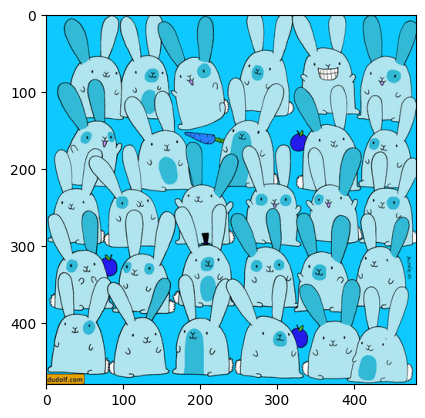

In [34]:
image = cv2.imread(os.path.join(path, 'rabbit2.png'))
plt.imshow(image)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

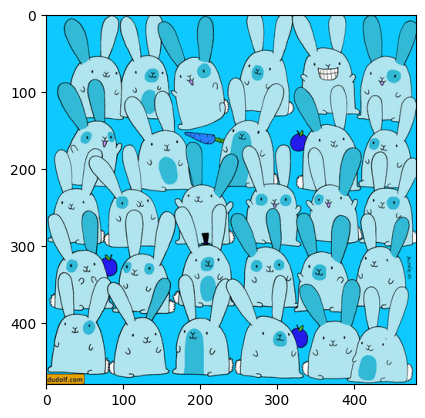

In [35]:
output_image = image.copy()
plt.imshow(output_image)

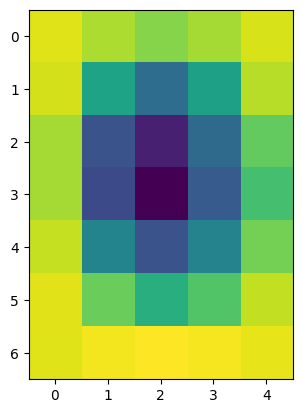

In [36]:
template = cv2.imread(os.path.join(template_path, 'rabbit2.png'), 0)
plt.imshow(template)

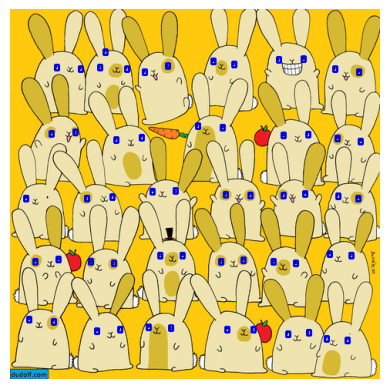

In [39]:
threshold = 0.68

w, h = template.shape[::-1]

result = cv2.matchTemplate(gray_image, template, cv2.TM_CCOEFF_NORMED)
loc = np.where(result >= threshold)

rectangles = []
for pt in zip(*loc[::-1]):
    rectangles.append([int(pt[0]), int(pt[1]), int(w), int(h)])

rectangles, _ = cv2.groupRectangles(rectangles, groupThreshold=1, eps=0.5)

for (x, y, w, h) in rectangles:
    cv2.rectangle(output_image, (x, y), (x + w, y + h), (255,0 , 0), 2)

plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [40]:
result = int(len(rectangles) / 2)
result

29

# Cat

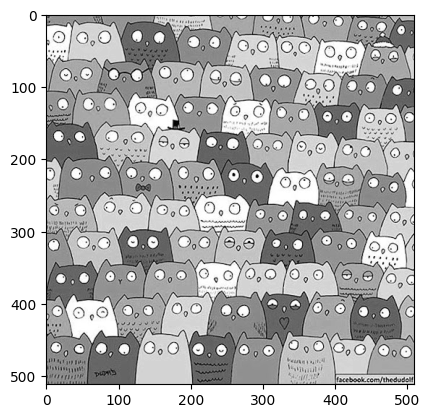

In [ ]:
image_2 = cv2.imread(os.path.join(path, 'cat.jpg'))
gray = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

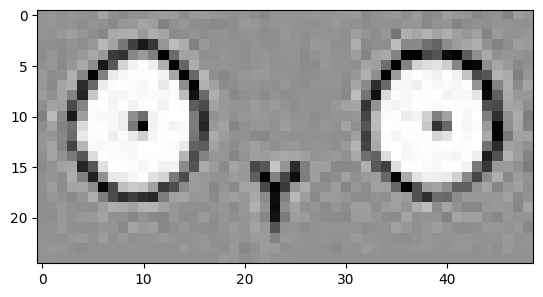

In [ ]:
crop = gray[352:377, 79:128]
plt.imshow(crop, cmap='gray')

In [ ]:
result_2 = cv2.matchTemplate(gray, crop, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result_2)
top_left = max_loc
bottom_right = (top_left[0] + crop.shape[1], top_left[1] + crop.shape[0])

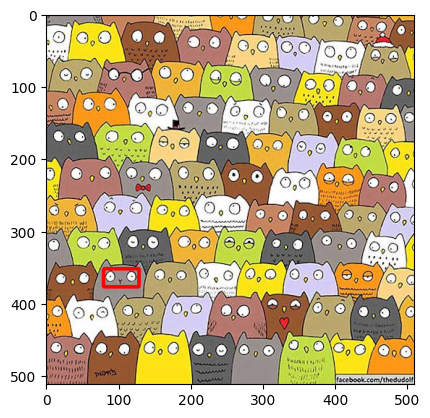

In [ ]:
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)
cv2.rectangle(image_2, top_left, bottom_right, (255, 0, 0), 4)
plt.imshow(image_2)

# Mice

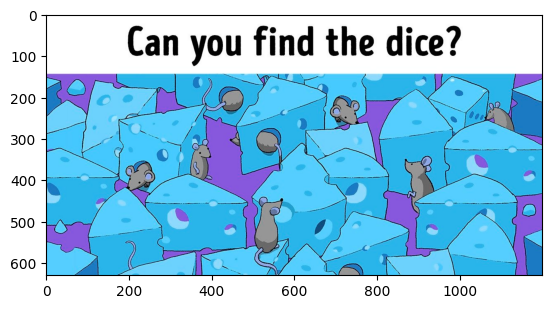

In [86]:
image = cv2.imread(os.path.join(path, 'mouse.jpg'))
plt.imshow(image)

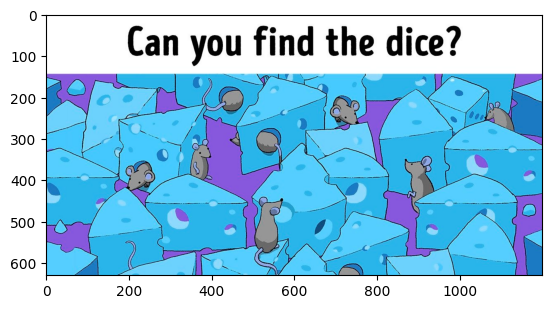

In [87]:
output_image = image.copy()
plt.imshow(output_image)

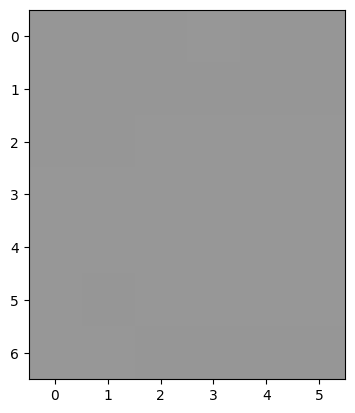

In [88]:
template = cv2.imread(os.path.join(template_path, 'mouse.png'), 0)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
template_rgb = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
plt.imshow(template_rgb)

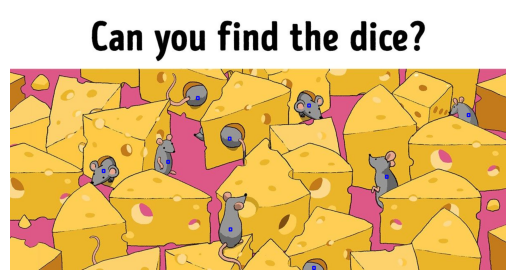

In [89]:
template_h, template_w, _ = template_rgb.shape

result = np.zeros((image_rgb.shape[0] - template_h + 1, image_rgb.shape[1] - template_w + 1))

for y in range(result.shape[0]):
    for x in range(result.shape[1]):
        roi = image_rgb[y:y + template_h, x:x + template_w]
        distance = np.linalg.norm(roi - template_rgb)
        result[y, x] = distance

result = cv2.normalize(result, None, 0, 1, cv2.NORM_MINMAX)

threshold = 0.74
loc = np.where(result >= threshold)

rectangles = []
for pt in zip(*loc[::-1]):
    rectangles.append([int(pt[0]), int(pt[1]), int(template_w), int(template_h)])

rectangles, _ = cv2.groupRectangles(rectangles, groupThreshold=1, eps=8)

for (x, y, w, h) in rectangles:
    cv2.rectangle(output_image, (x, y), (x + w, y + h), (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [76]:
result = len(rectangles)
result

8

# Boots

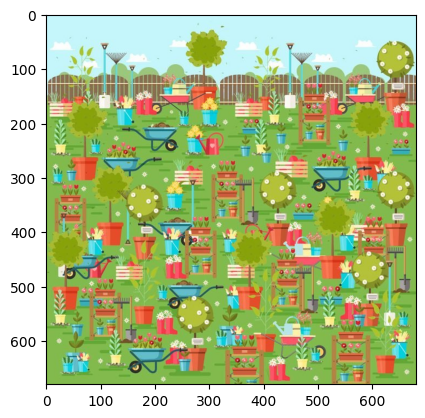

In [ ]:
image_4 = cv2.imread(os.path.join(path, 'pair_boot.jpg'))
image_4 = cv2.cvtColor(image_4, cv2.COLOR_BGR2RGB)
plt.imshow(image_4)

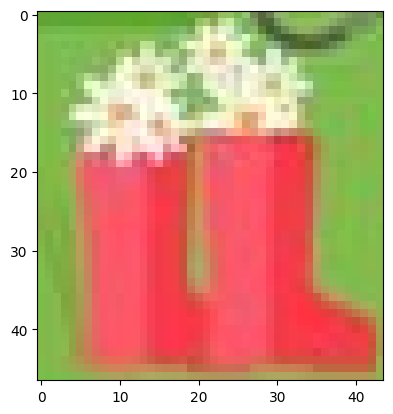

In [ ]:
crop_4 = image_4[628:675, 405:449]
plt.imshow(crop_4)

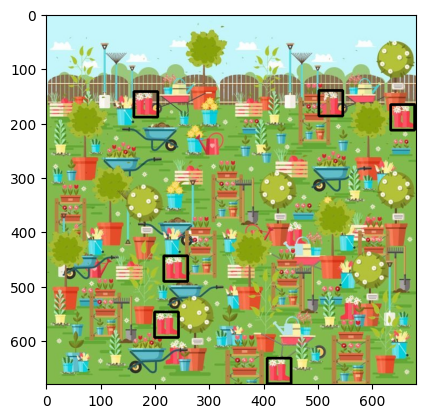

In [ ]:
result_4 = cv2.matchTemplate(image_4, crop_4, cv2.TM_CCOEFF_NORMED)
threshold = 0.65
loc = np.where(result_4 >= threshold)

rects = []
for pt in zip(*loc[::-1]):
	rects.append([pt[0], pt[1], crop_4.shape[1], crop_4.shape[0]])
rects = np.array(rects)
pick = []
x1 = rects[:,0]
y1 = rects[:,1]
x2 = rects[:,0] + rects[:,2]
y2 = rects[:,1] + rects[:,3]
area = (x2 - x1 + 1) * (y2 - y1 + 1)
idxs = np.argsort(y2)

while len(idxs) > 0:
	last = len(idxs) - 1
	i = idxs[last]
	pick.append(i)
	xx1 = np.maximum(x1[i], x1[idxs[:last]])
	yy1 = np.maximum(y1[i], y1[idxs[:last]])
	xx2 = np.minimum(x2[i], x2[idxs[:last]])
	yy2 = np.minimum(y2[i], y2[idxs[:last]])
	w = np.maximum(0, xx2 - xx1 + 1)
	h = np.maximum(0, yy2 - yy1 + 1)
	overlap = (w * h) / area[idxs[:last]]
	idxs = np.delete(idxs, np.concatenate(([last], np.where(overlap > 0.5)[0])))
for i in pick:
	cv2.rectangle(image_4, (rects[i][0], rects[i][1]), (rects[i][0] + rects[i][2], rects[i][1] + rects[i][3]), (0, 0, 0), 4)

plt.imshow(image_4)

# Rabbit1

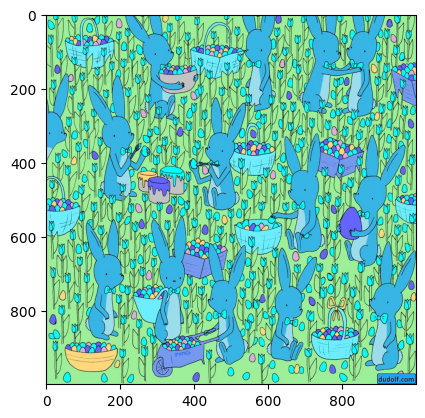

In [78]:
image = cv2.imread(os.path.join(path, 'rabbit.jpeg'))
plt.imshow(image)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

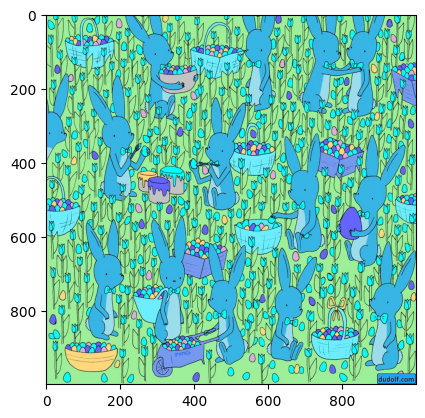

In [79]:
output_image = image.copy()
plt.imshow(output_image)

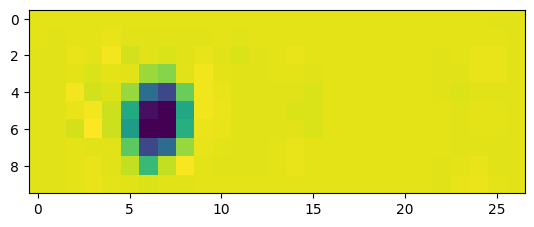

In [80]:
template = cv2.imread(os.path.join(template_path, 'rabbit1.png'), 0)
plt.imshow(template)

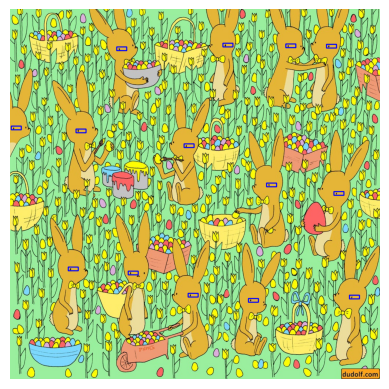

In [81]:
threshold = 0.75

w, h = template.shape[::-1]

result = cv2.matchTemplate(gray_image, template, cv2.TM_CCOEFF_NORMED)
loc = np.where(result >= threshold)

rectangles = []
for pt in zip(*loc[::-1]):
    rectangles.append([int(pt[0]), int(pt[1]), int(w), int(h)])

rectangles, _ = cv2.groupRectangles(rectangles, groupThreshold=1, eps=0.5)

for (x, y, w, h) in rectangles:
    cv2.rectangle(output_image, (x, y), (x + w, y + h), (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [82]:
result = len(rectangles)
result

14